Topic 4.6  |  三维散点
# 马氏距离、概率密度等高线
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [2]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt 

import os

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

### 自定义函数

In [3]:
def Mahal_d(Mu, Sigma, x):
    # 计算马哈距离
  
    x_demeaned = x - Mu
    inv_covmat = np.linalg.inv(Sigma)
    left = np.dot(x_demeaned, inv_covmat)
    mahal = np.dot(left, x_demeaned.T)
    return np.sqrt(mahal).diagonal()


def Mahal_d_2_pdf(d,Sigma):
    # 将马氏距离转化为概率密度
    
    scale_1 = np.sqrt(np.linalg.det(Sigma))
    scale_2 = (2*np.pi)**(3/2)
    pdf = np.exp(-d**2/2)/scale_1/scale_2
    
    return pdf

### 产生数据

In [4]:
x1 = np.linspace(-5,5,201)
x2 = np.linspace(-5,5,201)

xx1,xx2 = np.meshgrid(x1,x2)

x_array = np.vstack([xx1.ravel(),xx2.ravel()]).T

Mu = np.array([[0],
               [0]]).T

Sigma = np.array([[1,0.5],
                  [0.5,1]])

total_variance = np.diag(Sigma).sum()

x_array = np.vstack([xx1.ravel(),xx2.ravel()]).T

Mu = np.array([[0],
               [0]]).T

# 马氏距离
d_array = Mahal_d(Mu, Sigma, x_array)
d_array = d_array.reshape(xx1.shape)

# 计算概率密度
# 将马氏距离转化为概率密度
PDF_array = Mahal_d_2_pdf(d_array,Sigma)


C:\Users\james\AppData\Local\Temp\ipykernel_15884\3059783307.py:8: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(mahal).diagonal()


### 马氏距离等高线

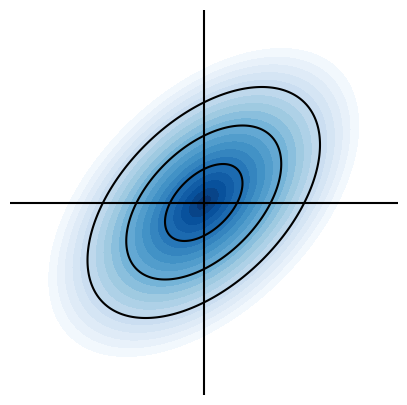

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))

plt.contour(xx1, xx2, d_array, levels = [1, 2, 3], colors = 'k')
plt.contourf(xx1, xx2, d_array, cmap='Blues_r', levels=np.linspace(0,4,21))

ax.axhline(0, color = 'k')
ax.axvline(0, color = 'k')
ax.set_xlabel('$x_1$')
ax.set_xlabel('$x_2$')
ax.axis('off')

fig.savefig('Figures/马氏距离等高线.svg', format='svg')

### 概率密度等高线

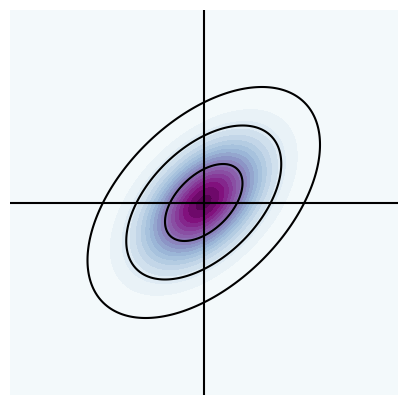

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))

plt.contour(xx1, xx2, d_array, levels = [1, 2, 3], colors = 'k')
# 增加马氏距离等高线
plt.contourf(xx1, xx2, PDF_array, cmap='BuPu', levels=20)

ax.axhline(0, color = 'k')
ax.axvline(0, color = 'k')
ax.set_xlabel('$x_1$')
ax.set_xlabel('$x_2$')
ax.axis('off')

fig.savefig('Figures/概率密度等高线.svg', format='svg')

In [ ]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023